1. [Best strategies](#strategies)
    1. [Binance historical data (08/17/2017 - 12/25/2020)](#alltime)
    2. [No bullrun phase (03/01/2018 - 11/15/2020)](#nobullrun)
    3. [Save strategies](#save)

# Best strategies <a name="strategies"></a>

In [2]:
import pandas as pd
import os

We will now collect all the results into one dataframe to easily compare the strategies.

In [3]:
df = pd.DataFrame()

for result in os.listdir("./result"):
    result = 'result/' + result
    temp = pd.read_csv(result)
    df = pd.concat([df, temp])

To evaluate our strategy we will use Van's System Quality Number (SQN) which is one of the many indicators designed to assist traders in determining the strengths, desirability, quality etc of a trading system. The idea behind SQN is to use it to find good quality strategies. And a good quality strategy is seen as one that is both tradable (is it easy, or is it difficult to trade) and efficient (does it make good money when a money management strategy is applied).

The following values suggest the following “qualities” :

* 1.6 - 1.9 Below average
* 2.0 - 2.4 Average
* 2.5 - 2.9 Good
* 3.0 - 5.0 Excellent
* 5.1 - 6.9 Superb
* 7.0 - Holy Grail

The formula : 
* SquareRoot(NumberTrades) * Average(TradesProfit) / StdDev(TradesProfit)

The sqn value should be deemed reliable when the number of trades **>= 30**

Therefore we will remove all line with a total trades less than 30.

In [4]:
df_result = df.loc[(df['Total win'] + df['Total loss']) >= 30]

And then sort the dataframe according their rank.

In [5]:
df_alltime = df_result.sort_values('SQN', ascending=False)
df_alltime['Rank'] = df_alltime['SQN'].rank(method='min', ascending=False)

## Binance historical data (08/17/2017 - 12/25/2020) <a name="alltime"></a>

In [6]:
topSQN = df_alltime.head(10)

topSqnSqn = list(topSQN['SQN'])
topSqnProfit = list(round(topSQN['%'],3))
topSqnWin = list(topSQN['Total win'])
topSqnLoss = list(topSQN['Total loss'])
index = list(topSQN['Rank'])

topSQN

Pair Timeframe       Start         End Strategy  Period  Final value  \
1   ETHUSDT        6h  2017-01-01  2020-12-31      SMA      11    14874.364   
2   BTCUSDT        8h  2017-01-01  2020-12-31      SMA      12    13813.646   
2   ETHUSDT        6h  2017-01-01  2020-12-31      SMA      12    14564.124   
1   BTCUSDT       12h  2017-01-01  2020-12-31      SMA      11    13937.049   
0   ETHUSDT        6h  2017-01-01  2020-12-31      SMA      10    14330.644   
3   BTCUSDT        6h  2017-01-01  2020-12-31      SMA      13    13745.854   
0   BTCUSDT       12h  2017-01-01  2020-12-31      SMA      10    13747.955   
2   BTCUSDT       12h  2017-01-01  2020-12-31      SMA      12    14021.213   
12  BTCUSDT        8h  2017-01-01  2020-12-31      SMA      22    14099.781   
8   BTCUSDT        4h  2017-01-01  2020-12-31      SMA      18    13649.596   

         %  Total win  Total loss   SQN  Rank  
1   48.824        122         243  3.05   1.0  
2   38.188         83         178  2.89   2.0  
2   45.720        113         249  2.88   3.0  
1   39.309         56         112  2.87   4.0  
0   43.384        129         265  2.82   5.0  
3   37.239         96         240  2.82   5.0  
0   37.419         59         117  2.81   7.0  
2   40.150         52         110  2.79   8.0  
12  41.051         49         116  2.75   9.0  
8   36.320        111         310  2.75   9.0

In our top 10 best strategies return we have 1 excellent System Quality Number, all the rests are good. 

We have mainly BTCUSDT pair traded however, the only 3 strategy in that top10 that traded ETHUSDT are listed in the top 5 best sqn (and even top 1 with an excellent sqn > 3).

Surprisingly, our SMA strategy succedeed far better than our RSI. This might be explained by the fact that the RSI has taken less than 30 positions on "high" timeframe (> 4h). 

The few positions taken are not even sucessfull for the majority :

In [7]:
tfhigh_rsi = df_alltime.loc[(df_alltime['Strategy'] == 'RSI') & ((df_alltime['Timeframe'] == '6h') | (df_alltime['Timeframe'] == '8h') | (df_alltime['Timeframe'] == '12h') | (df_alltime['Timeframe'] == '1w'))]

tfhigh_rsi

Pair Timeframe       Start         End Strategy  Period  Final value  \
2  BTCUSDT        6h  2017-01-01  2020-12-31      RSI      12    10325.354   
1  BTCUSDT        6h  2017-01-01  2020-12-31      RSI      11     9857.332   
0  ETHUSDT        6h  2017-01-01  2020-12-31      RSI      10     9315.605   
0  BTCUSDT        6h  2017-01-01  2020-12-31      RSI      10     9469.514   

       %  Total win  Total loss   SQN   Rank  
2  3.254         22           9  0.40  507.0  
1 -1.427         23          10 -0.18  584.0  
0 -6.844         21          13 -0.63  668.0  
0 -5.305         23          12 -0.70  683.0

Back to our top 10, we notice that we have many values of period near 10 which means we might have unfortunately missed some good strategy using period < 10. This is something to take into account next time we run our code.

We can also notice that a better sqn doesn't necessary mean better profit as the next charts can illustrates :

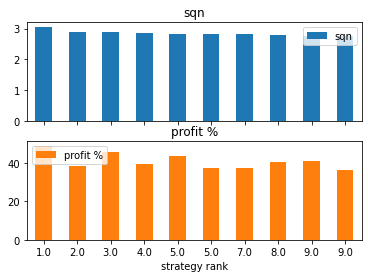

In [8]:
topSqnBars = pd.DataFrame({'sqn': topSqnSqn, 'profit %': topSqnProfit}, index=index)
topSqnBars.index.name = 'strategy rank'
topSqnBarsSplit = topSqnBars.plot.bar(rot=0, subplots=True)
topSqnBarsSplit[1].legend(loc=2);

What's interesting is to see that all our top strategies made at least 2x more negatives trades than positives, nevertheless the final results remains positive. This mean we have a good ratio per trade, in other words for 1 winning trade we can expect to lose *x* times before having a final outcome of 0 since our one profit was either too big, or our losses too small.

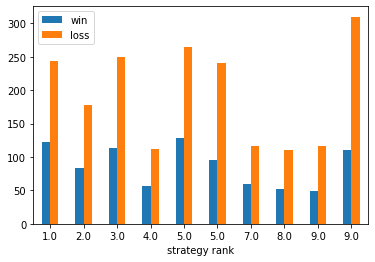

In [9]:
topSqnBars2 = pd.DataFrame({'win': topSqnWin, 'loss': topSqnLoss}, index=index)
topSqnBars2.index.name = 'strategy rank'
topSqnBars2.plot.bar(rot=0);

This really good ratio per trade may be the result of the bullrun that occured in 2017 and end November/start of December 2020 which might have results in big gains. 

This assumptions can be backed with the fact that all our top strategies were applied to our historical data that includes the bullrun period (08/17/2017 - 12/25/2020).

Let's see and compare with what we will get if we remove the bullrun period.

## No bullrun phase (03/01/2018 - 11/15/2020) <a name="nobullrun"></a>

In [10]:
df_nobullrun = df_result.loc[df_result['Start'] == '2018-03-01'].sort_values('SQN', ascending=False)
df_nobullrun['Rank'] = df_nobullrun['SQN'].rank(method='min', ascending=False)

topNoBullrun = df_nobullrun.head(10)

In [11]:
def sameETHTop(s):
    """
    Display in a different background color the strategies on ETHUSDT pair already present in our previous all time top 10.
    """
    if (s['Pair'] == 'ETHUSDT' and s['Timeframe'] == '6h' and s['Strategy'] == 'SMA') and (s['Period'] == 11 or s['Period'] == 12 or s['Period'] == 10):
        return ['background-color: green']*s.size
    else:
        return ['background-color: default']*s.size
        
topNoBullrun.reset_index(drop=True).style.apply(sameETHTop, axis=1)

It looks like in time of range our strategies were more successfull on the ETHUSDT pair using SMA indicator. We notice that our previous 3 strategy on ETHUSDT that worked particularly fine on the all time period are also present in that new top 10 (at the index 2, 4 and 7).

This is reassuring as we don't always know if we are in a trend or range period, but we now know that some of our strategies works fine with both. However, the sqn was not as good as before during this period, actually it is even on average (2.0 - 2.4).

What we can also notice is that the timeframes resulting in better performance are lower than if we include the bullrun period (many 4h and no 8/12h), and conversely for the SMA period (only 3 lower or equal to 12 versus 7).

Let's just have a quicklook on the rank of the BTCUSDT pair that were in our all time top 10.

In [12]:
df_nobullrun.loc[(df_nobullrun['Pair'] == 'BTCUSDT') & (df_nobullrun['Timeframe'] == '12h') & (df_nobullrun['Strategy'] == 'SMA') & (df_nobullrun['Period'] == 10)]

Pair Timeframe       Start         End Strategy  Period  Final value  \
0  BTCUSDT       12h  2018-03-01  2020-11-15      SMA      10    11682.146   

        %  Total win  Total loss   SQN  Rank  
0  16.542         44         100  1.94  17.0

In [13]:
df_nobullrun.loc[(df_nobullrun['Pair'] == 'BTCUSDT') & (df_nobullrun['Timeframe'] == '12h') & (df_nobullrun['Strategy'] == 'SMA') & (df_nobullrun['Period'] == 11)]

Pair Timeframe       Start         End Strategy  Period  Final value  \
1  BTCUSDT       12h  2018-03-01  2020-11-15      SMA      11    11634.965   

        %  Total win  Total loss   SQN  Rank  
1  16.072         41          97  1.86  28.0

In [14]:
df_nobullrun.loc[(df_nobullrun['Pair'] == 'BTCUSDT') & (df_nobullrun['Timeframe'] == '8h') & (df_nobullrun['Strategy'] == 'SMA') & (df_nobullrun['Period'] == 22)]

Pair Timeframe       Start         End Strategy  Period  Final value  \
12  BTCUSDT        8h  2018-03-01  2020-11-15      SMA      22    11915.108   

         %  Total win  Total loss   SQN  Rank  
12  17.173         36         103  1.86  28.0

In [15]:
df_nobullrun.loc[(df_nobullrun['Pair'] == 'BTCUSDT') & (df_nobullrun['Timeframe'] == '4h') & (df_nobullrun['Strategy'] == 'SMA') & (df_nobullrun['Period'] == 18)]

Pair Timeframe       Start         End Strategy  Period  Final value  \
8  BTCUSDT        4h  2018-03-01  2020-11-15      SMA      18    11685.979   

       %  Total win  Total loss   SQN  Rank  
8  16.86         84         260  1.84  34.0

In [16]:
df_nobullrun.loc[(df_nobullrun['Pair'] == 'BTCUSDT') & (df_nobullrun['Timeframe'] == '6h') & (df_nobullrun['Strategy'] == 'SMA') & (df_nobullrun['Period'] == 13)]

Pair Timeframe       Start         End Strategy  Period  Final value  \
3  BTCUSDT        6h  2018-03-01  2020-11-15      SMA      13    11576.825   

        %  Total win  Total loss   SQN  Rank  
3  15.809         76         206  1.79  46.0

In [17]:
df_nobullrun.loc[(df_nobullrun['Pair'] == 'BTCUSDT') & (df_nobullrun['Timeframe'] == '12h') & (df_nobullrun['Strategy'] == 'SMA') & (df_nobullrun['Period'] == 12)]

Pair Timeframe       Start         End Strategy  Period  Final value  \
2  BTCUSDT       12h  2018-03-01  2020-11-15      SMA      12    11601.523   

        %  Total win  Total loss   SQN  Rank  
2  15.738         38          97  1.74  54.0

In [18]:
df_nobullrun.loc[(df_nobullrun['Pair'] == 'BTCUSDT') & (df_nobullrun['Timeframe'] == '8h') & (df_nobullrun['Strategy'] == 'SMA') & (df_nobullrun['Period'] == 12)]

Pair Timeframe       Start         End Strategy  Period  Final value  \
2  BTCUSDT        8h  2018-03-01  2020-11-15      SMA      12    11437.731   

        %  Total win  Total loss   SQN  Rank  
2  13.836         59         156  1.61  92.0

It doesn't look like they performed well. Even though their profits are positive their sqn are below average **so we prefer trading the BTCUSDT pair during upward trend and ETHUSDT in everytime.**

## Save strategies <a name="save"></a>

Now let's save our topSQN pandas dataframe to a JSON file so that we may reuse these strategies.

In [19]:
topSQN.to_json(r'top10sqn.json', orient='records')